<a href="https://colab.research.google.com/github/Sajjadali1111/Anomaly-detection-in-Financial-/blob/main/outlierdectection_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="5">Outlier Detection in Financial Transaction</font></h1>

# About The Dataset

This dataset is Paysim synthetic dataset of mobile money transactions. The **onlinefraud.csv** dataset includes the following fields:

| Field          | Description                                                                      | Type   |
| -------------  | -------------------------------------------------------------------------------- | ------ |
| step           | Maps a unit of time in the real world. In this case 1 step is 1 hour of time.    | int    |
| type           | CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER                                   | object |
| amount         | amount of the transaction in local currency                                      | float  |
| nameOrig       | customer who started the transaction                                             | object |
| oldbalanceOrig | initial balance before the transaction                                           | float  |
| newbalanceOrig | customer's balance after the transaction.                                        | float  |
| nameDest       | recipient ID of the transaction.                                                 | object |
| oldbalanceDest | initial recipient balance before the transaction.                                | float  |
| newbalanceDest | recipient's balance after the transaction.                                       | float  |
| isFraud        | identifies a fraudulent transaction (1) and non fraudulent (0)                   | int    |
| isFlaggedFraud | identifies a flagged fraudulent transaction (1) and non flagged fraudulent (0)   | int    |

Column definitions were gathered from [https://www.kaggle.com/datasets/ealaxi/paysim1]

# Importing Libraries, Data Preprocessing and EDA

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA

### Importing the Dataset

In [ ]:
data = pd.read_csv('onlinefraud.csv')

### Data Preprocessing and Analysis


In [ ]:
#statistical description of dataframe
pd.options.display.float_format = '{:.6f}'.format
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,69858.000000,69858.000000,69858.000000,69858.000000,69858.000000,69857.000000,69857.000000,69857.000000
mean,7.893326,164017.621348,904306.609949,920297.978126,854352.169703,1185140.928276,0.001532,0.000000
std,1.874512,331373.006601,2791616.423730,2829881.416863,2403000.411124,2871790.709347,0.039107,0.000000
min,1.000000,0.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,9011.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,44049.185000,19908.500000,0.000000,14160.500000,21130.680000,0.000000,0.000000
75%,9.000000,199130.740000,172117.502500,194020.535000,518607.287500,982411.350000,0.000000,0.000000
max,9.000000,10000000.000000,33797391.550000,34008736.980000,31306920.440000,31976992.090000,1.000000,0.000000


In [ ]:
#check data has been read in properly
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0.000000,0.000000
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0.000000,0.000000
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1.000000,0.000000
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1.000000,0.000000
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Drop isfruad column has been removed
data.drop('isFraud', axis = 1, inplace=True)

In [ ]:
data.drop('isFlaggedFraud', axis = 1, inplace=True)

In [ ]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000


In [ ]:
#To check sum of nan value in data frame
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
dtype: int64

### Data Exploratory Analysis Visualization


I've generated a time series plot to visually analyze transaction patterns over time. This visualization is instrumental in pinpointing specific time step with the highest transaction amounts.

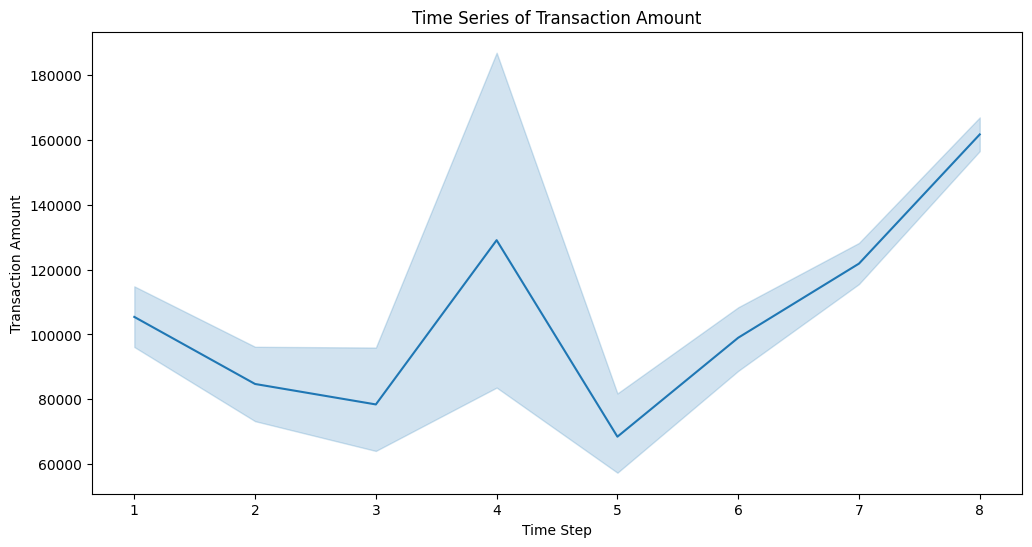

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='step', y='amount', data=data)
plt.title('Time Series of Transaction Amount')
plt.xlabel('Time Step')
plt.ylabel('Transaction Amount')
plt.show()


A scatter plot of 'oldbalanceOrg' vs. 'newbalanceOrig'  was create to help detect anomalies in account balances before and after transactions.

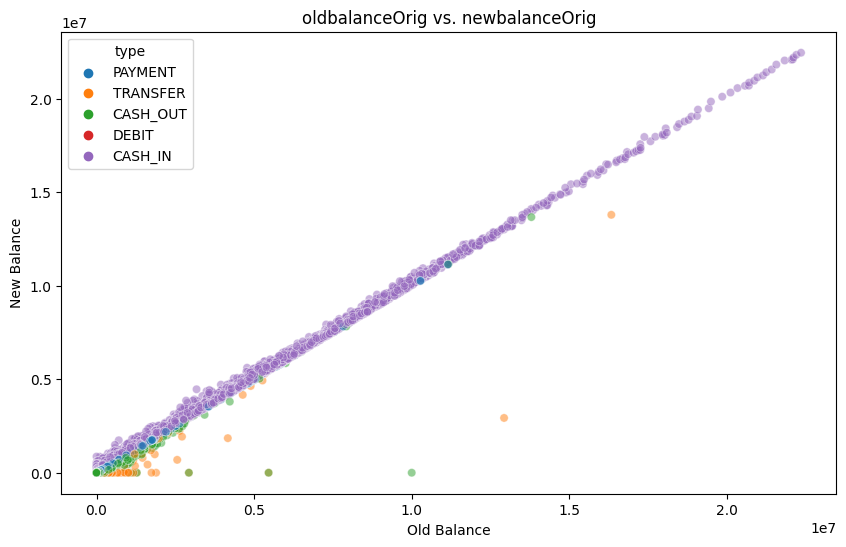

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', data=data, hue='type', alpha=0.5)
plt.title('oldbalanceOrig vs. newbalanceOrig')
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.show()


In this scatter plot we can observe the presence of a few scattered points that deviate from the general trend of the data. These points represent outliers. For example, some points have a very high new balance compared to their old balance, or vice versa. These points may indicate fraudulent transactions or errors in the data.

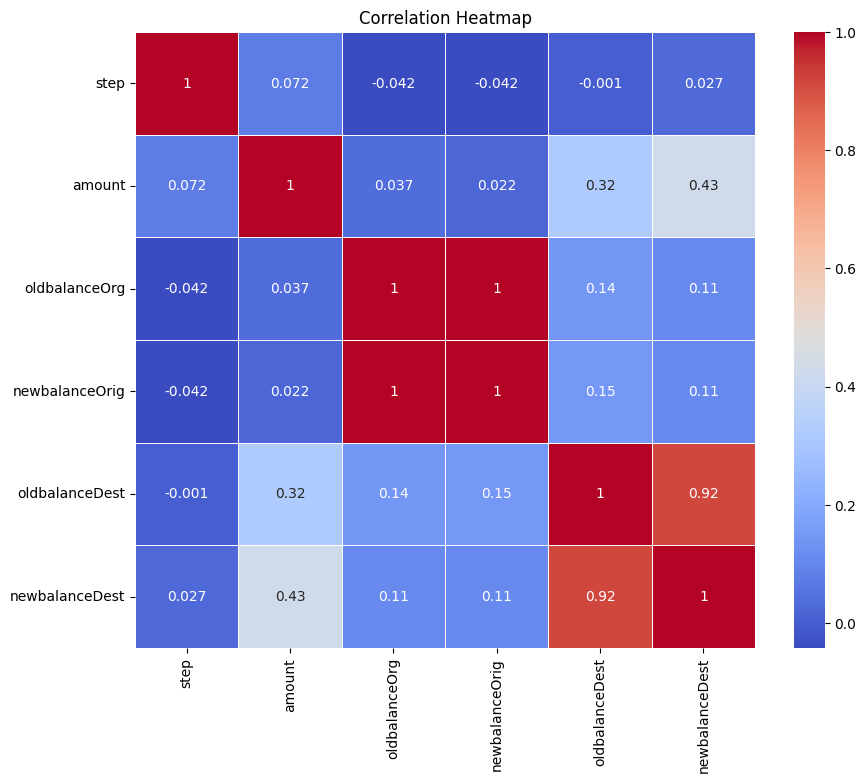

In [ ]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Above heatmap of correlations between numeric features can help identify relationships and anomalies in the transaction data. This heatmap help us in observing the corelation between the numerical variables. As shown in above heatmap 'oldbalanceDest', 'oldbalanceOrig', 'newbalanceDest' and 'newbalanceOrig' has correlation of 1 we remove 'newbalanceOrig' and 'oldbalanceDest' from our feature set.

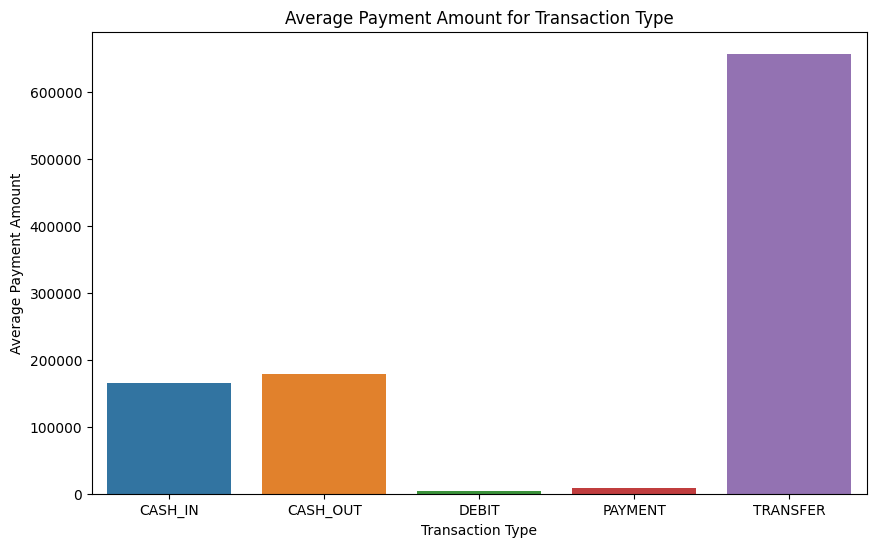

In [ ]:
grouped_data = data.groupby('type')['amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='amount', data=grouped_data)
plt.title('Average Payment Amount for Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Payment Amount')

plt.show()


Above bar plot show that transfer type has the most average payment in the provided transaction data. It also indicated that most ourliers exist in transfer type of transaction

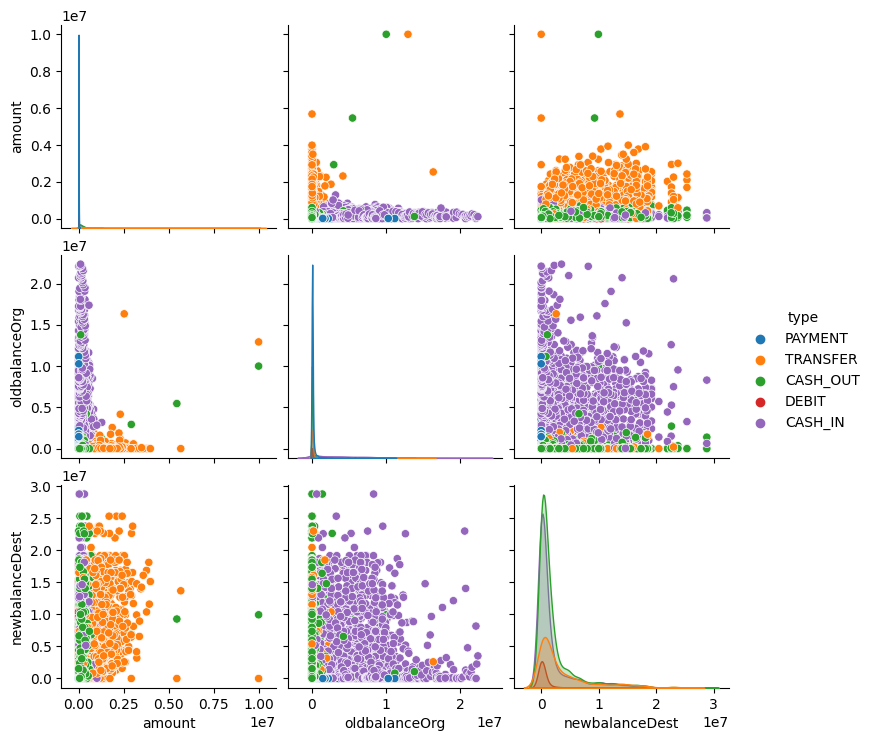

In [ ]:
sns.pairplot(data, vars=['amount', 'oldbalanceOrg', 'newbalanceDest'], hue='type')
plt.show()


Above presented pairplot visualize the pairwise relationships and correlations between numeric variables. This create a grid of scatterplots showing how different numeric variables correlate with each other, and it uses color to distinguish transaction types.

A violin plot combines elements of a box plot and a KDE (Kernel Density Estimation) plot, which makes it great for visualizing the distribution of data, including outliers. This Violin plots provide a good overview of the data distribution and show outliers as well.

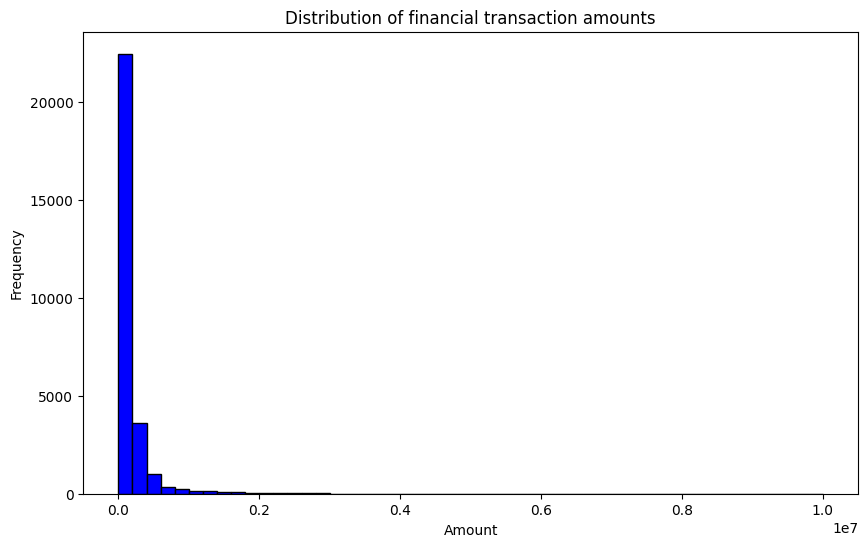

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data['amount'], bins=50, color = 'blue', edgecolor='black')
plt.title('Distribution of financial transaction amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

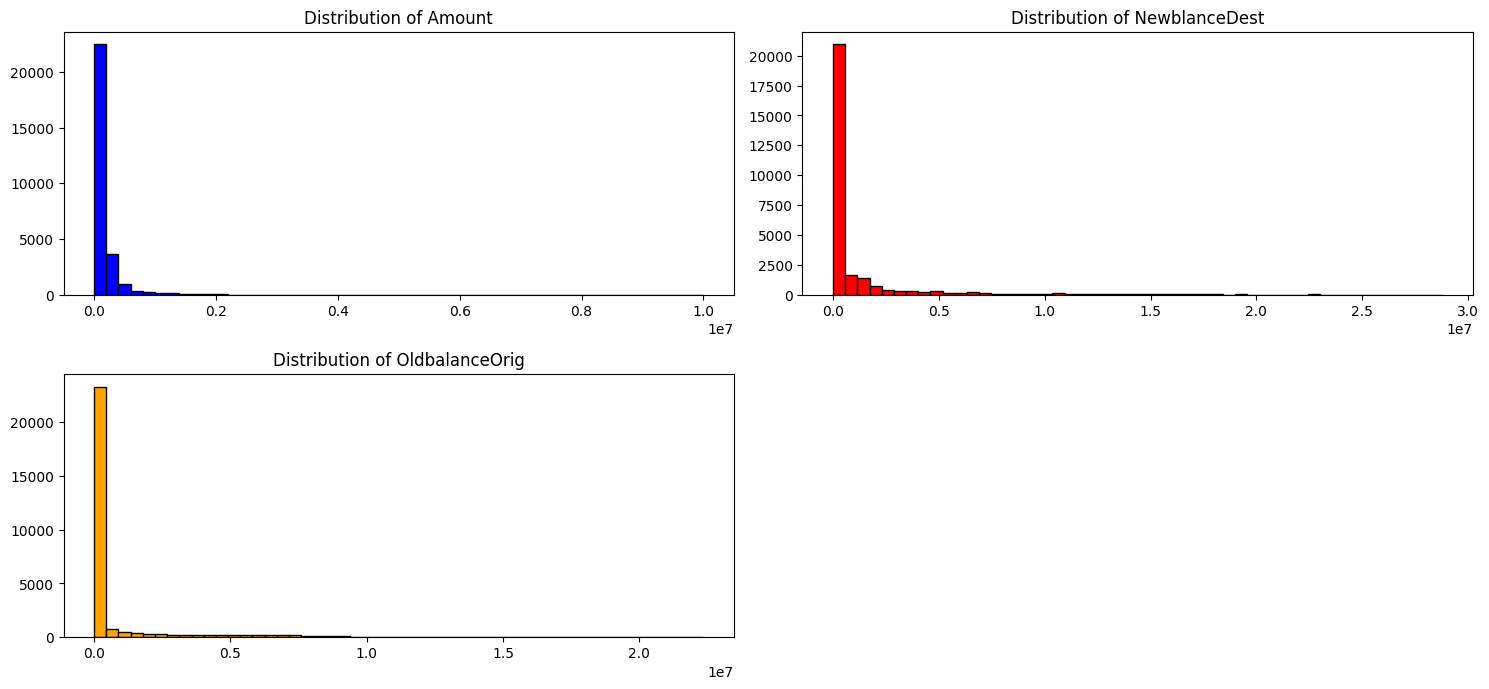

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

axs[0, 0].hist(data['amount'], bins=50, color='blue', edgecolor='black')
axs[0, 0].set_title('Distribution of Amount')

axs[1, 0].hist(data['oldbalanceOrg'], bins=50, color='orange', edgecolor='black')
axs[1, 0].set_title('Distribution of OldbalanceOrig')

axs[0, 1].hist(data['newbalanceDest'], bins=50, color='red', edgecolor='black')
axs[0, 1].set_title('Distribution of NewblanceDest')

fig.delaxes(axs[2, 0])
fig.delaxes(axs[2, 1])
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()

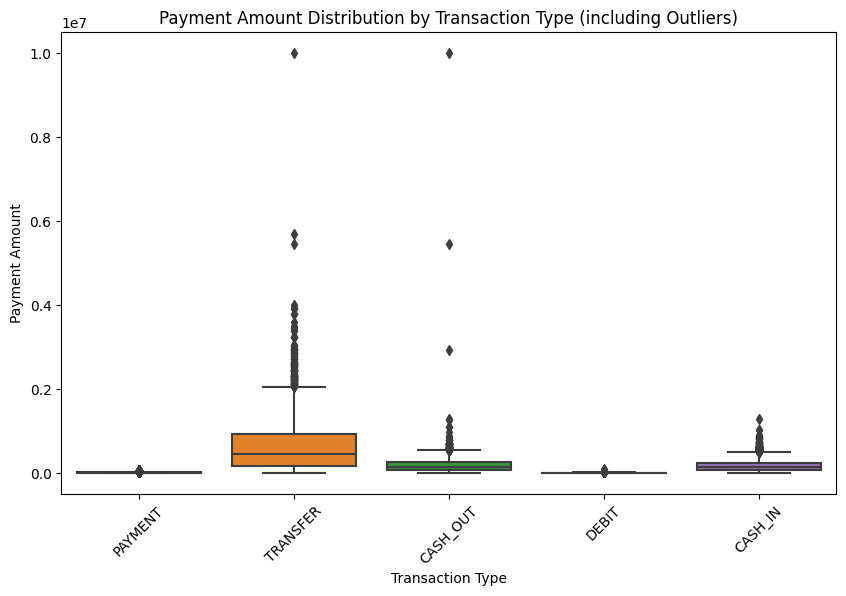

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=data)
plt.title('Payment Amount Distribution by Transaction Type (including Outliers)')
plt.xlabel('Transaction Type')
plt.ylabel('Payment Amount')
plt.xticks(rotation=45)
plt.show()


The box plots indicate that the distribution of payment amounts varies greatly by transaction type. The following are some of the observations:
* The "TRANSFER" category exhibits a bimodal distribution, showing that transfers are divided into two separate groups.
* The "CASH-OUT" category has a similar distribution to the "TRANSFER" category, but both have a lower median and interquartile range.



# Feature Engineering

In [ ]:
features = data[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceDest', 'newbalanceOrig', 'oldbalanceDest']]
features.head()

,step,type,amount,oldbalanceOrg,newbalanceDest,newbalanceOrig,oldbalanceDest
0,1,PAYMENT,9839.640000,170136.000000,0.000000,160296.360000,0.000000
1,1,PAYMENT,1864.280000,21249.000000,0.000000,19384.720000,0.000000
2,1,TRANSFER,181.000000,181.000000,0.000000,0.000000,0.000000
3,1,CASH_OUT,181.000000,181.000000,0.000000,0.000000,21182.000000
4,1,PAYMENT,11668.140000,41554.000000,0.000000,29885.860000,0.000000


In [ ]:
features_one_hot = pd.get_dummies(features, columns=['type'])
features_one_hot.fillna(0)
features_one_hot.head()

,step,amount,oldbalanceOrg,newbalanceDest,newbalanceOrig,oldbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.640000,170136.000000,0.000000,160296.360000,0.000000,0,0,0,1,0
1,1,1864.280000,21249.000000,0.000000,19384.720000,0.000000,0,0,0,1,0
2,1,181.000000,181.000000,0.000000,0.000000,0.000000,0,0,0,0,1
3,1,181.000000,181.000000,0.000000,0.000000,21182.000000,0,1,0,0,0
4,1,11668.140000,41554.000000,0.000000,29885.860000,0.000000,0,0,0,1,0


In [ ]:
# Convert data types of columns in the one-hot encoded features DataFrame to float64
features_one_hot.astype('float64')

,step,amount,oldbalanceOrg,newbalanceDest,newbalanceOrig,oldbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1.000000,9839.640000,170136.000000,0.000000,160296.360000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,1.000000,1864.280000,21249.000000,0.000000,19384.720000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,1.000000,181.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,1.000000,181.000000,181.000000,0.000000,0.000000,21182.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,1.000000,11668.140000,41554.000000,0.000000,29885.860000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
69853,9.000000,30681.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
69854,9.000000,2866.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
69855,9.000000,2926.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
69856,9.000000,3704.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [ ]:
# Remove rows with missing values (NaN) from the one-hot encoded features DataFrame
features_one_hot.dropna(inplace = True)

In [ ]:
#To check sum of nan value in data frame
features_one_hot.isna().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceDest    0
newbalanceOrig    0
oldbalanceDest    0
type_CASH_IN      0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

# Model Development

Feature scaling

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_one_hot)

In [ ]:
features_scaled

array([[-3.67739954, -0.46527808, -0.26299605, ...,  1.19638243,
        -0.3113386 ,  0.22942092],
       [-3.67739954, -0.48934574, -0.31632971, ...,  1.19638243,
        -0.3113386 ,  0.22942092],
       [-3.67739954, -0.49442546, -0.3238766 , ..., -0.83585313,
         3.21193707,  0.22942092],
       ...,
       [ 0.59038962, -0.48632138, -0.32394144, ...,  1.19638243,
        -0.3113386 ,  0.22942092],
       [ 0.59038962, -0.48613908, -0.32394144, ...,  1.19638243,
        -0.3113386 ,  0.22942092],
       [ 0.59038962, -0.48379302, -0.32394144, ...,  1.19638243,
        -0.3113386 ,  0.22942092]])

In [ ]:
print(np.min(features_scaled))
print(np.max(features_scaled))

-4.358800424362384
29.682554202726248


## Isolation Forest

In [ ]:
iforest2 = IsolationForest(contamination=0.05)
iforest2.fit(features_scaled)
outliers_iforest = iforest2.predict(features_scaled)

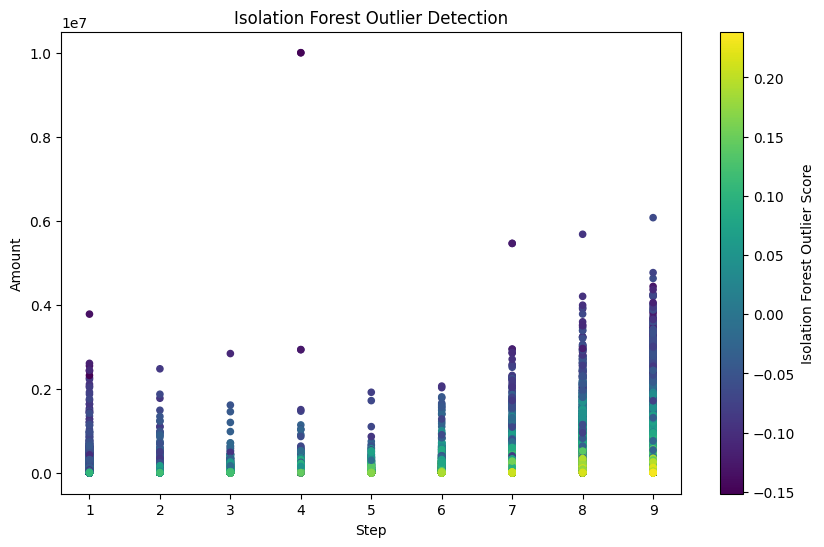

In [ ]:
outlier_scores = iforest2.decision_function(features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(features_one_hot['step'], features_one_hot['amount'], c=outlier_scores, cmap='viridis', s=20)
plt.colorbar(label='Isolation Forest Outlier Score')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.show()

In [ ]:
#droping highly correlated columns
features_one_hot.drop(["newbalanceOrig", "oldbalanceDest"], axis=1, inplace=True)

KeyError: "['newbalanceOrig', 'oldbalanceDest'] not found in axis"

In [ ]:
features_scaled = scaler.fit_transform(features_one_hot)

In [ ]:
iforest2 = IsolationForest(contamination=0.05)
iforest2.fit(features_scaled)
outliers_iforest = iforest2.predict(features_scaled)

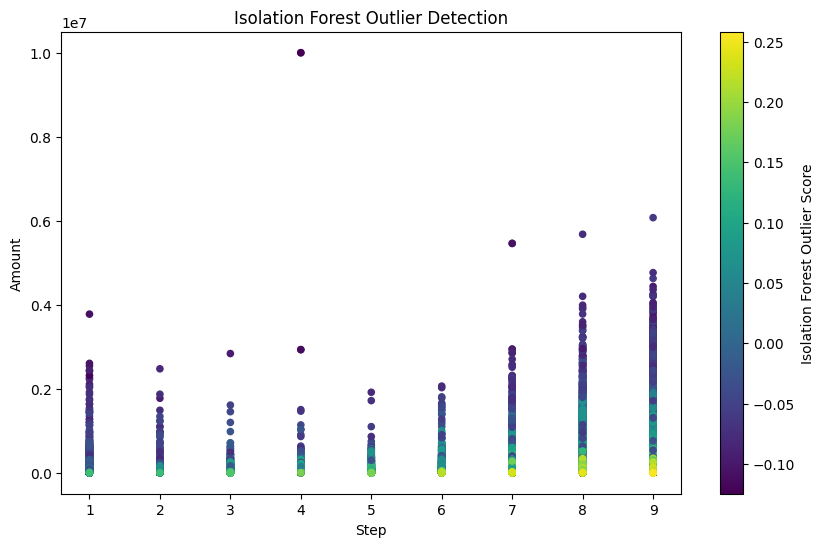

In [ ]:
outlier_scores = iforest2.decision_function(features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(features_one_hot['step'], features_one_hot['amount'], c=outlier_scores, cmap='viridis', s=20)
plt.colorbar(label='Isolation Forest Outlier Score')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.show()

Since shown by the results removing highly corelated columns does not effect the result of the model will will remove them from our training set.

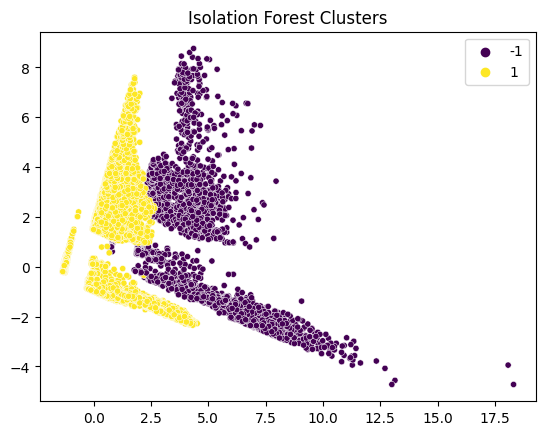

In [ ]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
outliers_iforest = iforest2.fit_predict(features_scaled)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=outliers_iforest, palette='viridis', s=20)
plt.title('Isolation Forest Clusters')
plt.show()


In [ ]:
features_scaled

array([[-2.40424842, -0.41784302, -0.28059388, ..., -0.1358818 ,
         1.01678573, -0.32710053],
       [-2.40424842, -0.44431185, -0.35062257, ..., -0.1358818 ,
         1.01678573, -0.32710053],
       [-2.40424842, -0.44989836, -0.36053186, ..., -0.1358818 ,
        -0.98349137,  3.05716409],
       ...,
       [ 0.65112009, -0.15397318, -0.36061699, ..., -0.1358818 ,
        -0.98349137, -0.32710053],
       [ 0.65112009,  0.0096623 , -0.36061699, ..., -0.1358818 ,
        -0.98349137, -0.32710053],
       [ 0.65112009, -0.24621232, -0.36061699, ..., -0.1358818 ,
        -0.98349137, -0.32710053]])

### Hyper parameter


In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': ['auto', 0.1, 0.2, 0.5],
    'contamination': [0.01, 0.05, 0.1]
}

def silhouette_scorer(estimator, features_scaled):
    labels = estimator.predict(features_scaled)
    return silhouette_score(features_scaled, labels)

grid_search_iforest = GridSearchCV(iforest2, param_grid=param_grid, scoring=silhouette_scorer, cv=5)
grid_search_iforest.fit(features_scaled)
print("Best Parameters for Isolation Forest:", grid_search_iforest.best_params_)


Best Parameters for Isolation Forest: {'contamination': 0.01, 'max_samples': 0.1, 'n_estimators': 200}


In [ ]:
results = grid_search_iforest.cv_results_
results

{'mean_fit_time': array([0.44027133, 0.72052541, 1.56452851, 0.59101696, 0.97657456,
        2.08176689, 0.64401999, 1.24771075, 2.33498344, 0.7168088 ,
        1.49188113, 2.96393561, 0.37290397, 0.84737186, 1.59431806,
        0.50142922, 1.10856657, 2.09773259, 0.59405336, 1.21012564,
        2.36392775, 0.72897897, 1.486414  , 2.81960287, 0.43896737,
        0.71584196, 1.58313174, 0.59358482, 0.96565633, 2.13709564,
        0.6011394 , 1.22206287, 2.33624001, 0.74014378, 1.41678195,
        2.96382117]),
 'std_fit_time': array([0.0661118 , 0.0081884 , 0.28952483, 0.10762491, 0.0150078 ,
        0.20648384, 0.11851043, 0.17900219, 0.2922279 , 0.08225443,
        0.22805904, 0.3421173 , 0.00728561, 0.14987017, 0.18452673,
        0.01008062, 0.15406194, 0.16288974, 0.0843703 , 0.19295801,
        0.20034939, 0.1195884 , 0.16437101, 0.30492462, 0.08066474,
        0.00778406, 0.24666816, 0.0881928 , 0.00203881, 0.16813796,
        0.09249295, 0.18472638, 0.25640755, 0.11243213, 0.135

### Fine Tuning

In [ ]:

best_params_iforest = {'contamination': 0.01, 'max_samples': 'auto', 'n_estimators': 100}

iforest_tuned = IsolationForest(**best_params_iforest)

iforest_tuned.fit(features_scaled)

predictions_iforest_tuned = iforest_tuned.predict(features_scaled)

silhouette = silhouette_score(features_scaled, predictions_iforest_tuned)
silhouette

0.5827499005324334

###Evaluation

In [ ]:
silhouette = silhouette_score(features_scaled, outliers_iforest)
db_index = davies_bouldin_score(features_scaled, outliers_iforest)
ch_index = calinski_harabasz_score(features_scaled, outliers_iforest)

print('Silhouette score for isolation forest:', silhouette)
print('Davies-Bouldin Index for isolation forest:', db_index)
print('Calinski-Harabasz Index for isolation forest:', ch_index)


Silhouette score for isolation forest: 0.5093289376554173
Davies-Bouldin Index for isolation forest: 2.0382037003211244
Calinski-Harabasz Index for isolation forest: 2370.400369189024


## Local outlier factor

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(features_scaled)

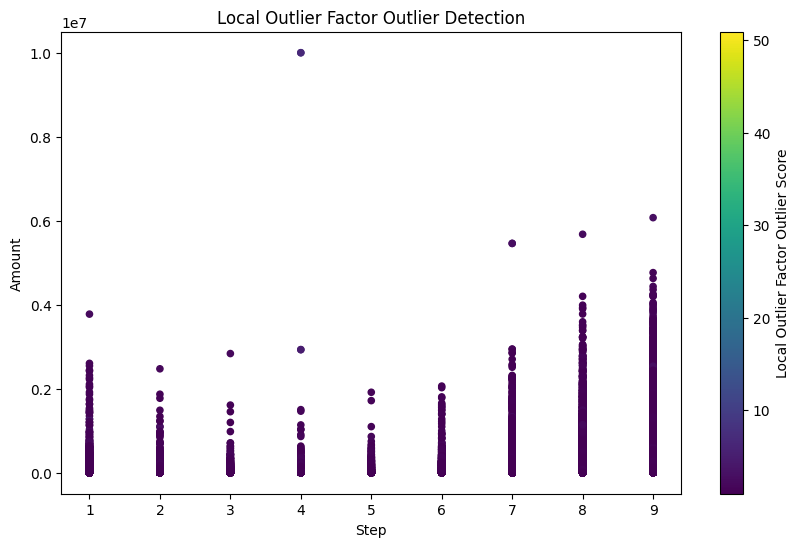

In [ ]:
lof_outlier_score = -lof.negative_outlier_factor_
plt.figure(figsize=(10, 6))
plt.scatter(features_one_hot.iloc[:, 0], features_one_hot.iloc[:, 1], c=lof_outlier_score , cmap='viridis', s=20)
plt.colorbar(label='Local Outlier Factor Outlier Score')
plt.title('Local Outlier Factor Outlier Detection')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.show()


### Hyper Parameters

In [ ]:

silhouette_scorer = make_scorer(silhouette_score, greater_is_better=True)

param_grid_lof = {
    'n_neighbors': [5, 10, 15],
    'contamination': [0.01, 0.05, 0.1],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_lof = GridSearchCV(lof, param_grid=param_grid_lof, scoring=silhouette_scorer, cv=5)
grid_search_lof.fit(features_scaled)

print("Best Parameters for Local Outlier Factor:", grid_search_lof.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

Best Parameters for Local Outlier Factor: {'algorithm': 'auto', 'contamination': 0.01, 'n_neighbors': 5}


In [ ]:
results = grid_search_lof.cv_results_
results

{'mean_fit_time': array([0.59828353, 0.75657196, 0.99282384, 0.59333868, 0.69805284,
        1.04308066, 0.59321542, 0.70075712, 0.8274756 , 4.85698137,
        5.14892731, 5.28541389, 4.87743602, 5.1322753 , 5.3060966 ,
        4.83338027, 4.99354596, 5.27536907, 0.86434889, 0.70044265,
        0.77684822, 0.71325874, 0.84474072, 0.77009463, 0.58760715,
        0.9612359 , 0.7735395 , 2.4042675 , 2.47421708, 2.39121113,
        2.22149124, 2.34184704, 2.40535064, 2.26921263, 2.34205523,
        2.40058589]),
 'std_fit_time': array([0.05787685, 0.08497307, 0.24790811, 0.05322679, 0.04692583,
        0.15198707, 0.04947987, 0.05191372, 0.07500058, 0.56042559,
        0.67423609, 0.56898315, 0.40693208, 0.69914476, 0.66461123,
        0.38572205, 0.51755531, 0.64863424, 0.17864581, 0.0502964 ,
        0.04681022, 0.13056801, 0.24056563, 0.04652904, 0.05144874,
        0.1567452 , 0.05464041, 0.55434587, 0.48329887, 0.35887564,
        0.33111494, 0.28513689, 0.46205581, 0.27496691, 0.380

### Fine Tuning

In [ ]:
best_params_lof = {'algorithm': 'auto', 'contamination': 0.01, 'n_neighbors': 5}

lof_tuned = LocalOutlierFactor(**best_params_lof)
lof_tuned.fit(features_scaled)

predictions_lof_tuned = lof_tuned.fit_predict(features_scaled)
silhouette_lof = silhouette_score(features_scaled, predictions_lof_tuned)
silhouette_lof

0.12186243694674041

###Evaluation

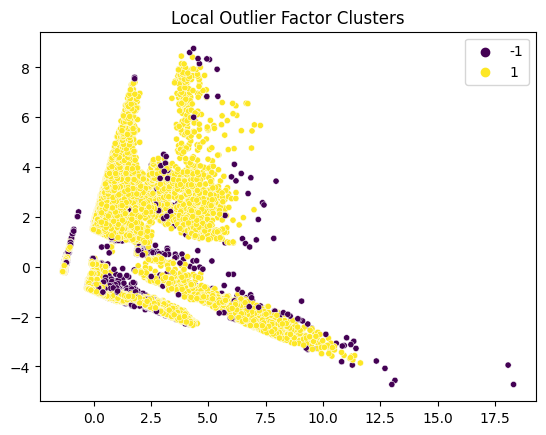

In [ ]:
outliers_lof = lof.fit_predict(features_scaled)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=outliers_lof, palette='viridis', s=20)
plt.title('Local Outlier Factor Clusters')
plt.show()

In [ ]:
silhouette_lof = silhouette_score(features_scaled, outliers_lof)
db_index_lof = davies_bouldin_score(features_scaled, outliers_lof)
ch_index_lof = calinski_harabasz_score(features_scaled, outliers_lof)

print('Silhouette score for Local outlier factor:', silhouette_lof)
print('Davies-Bouldin Index for Local outlier factor:', db_index_lof)
print('Calinski-Harabasz Index for Local outlier factor:', ch_index_lof)


Silhouette score for Local outlier factor: 0.20538399936827084
Davies-Bouldin Index for Local outlier factor: 5.6122004111565715
Calinski-Harabasz Index for Local outlier factor: 186.0933553237112


## One-Class SVM

In [ ]:
ocsvm = OneClassSVM(nu=0.05)
outliers_ocsvm = ocsvm.fit_predict(features_scaled)

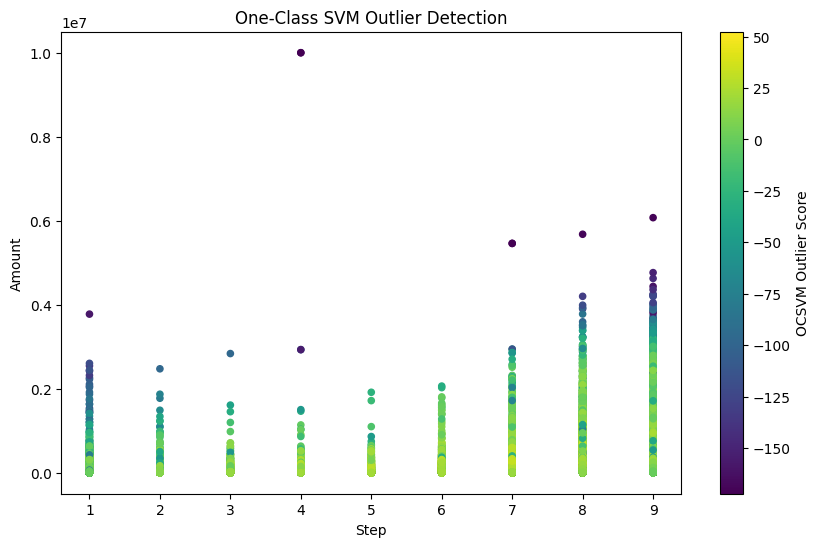

In [ ]:
ocsvm_outlier_score = ocsvm.decision_function(features_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(features_one_hot.iloc[:, 0], features_one_hot.iloc[:, 1], c = ocsvm_outlier_score, cmap='viridis', s=20)
plt.colorbar(label='OCSVM Outlier Score')
plt.title('One-Class SVM Outlier Detection')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.show()



### Hyper Parameters


In [ ]:
silhouette_scorer = make_scorer(silhouette_score, greater_is_better=True)

param_grid_ocsvm = {
    'nu': [0.01, 0.05, 0.1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search_ocsvm = GridSearchCV(ocsvm, param_grid=param_grid_ocsvm, scoring=silhouette_scorer, cv=5)
grid_search_ocsvm.fit(features_scaled)

print("Best Parameters for One-Class SVM:", grid_search_ocsvm.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

Best Parameters for One-Class SVM: {'gamma': 'scale', 'kernel': 'linear', 'nu': 0.01}


In [ ]:
results = grid_search_ocsvm.cv_results_
results

{'mean_fit_time': array([ 0.27544489,  1.26372318,  3.14372964,  0.58263607,  2.33598561,
         4.87456927,  0.55237136,  2.85220771,  7.73249326,  0.75888376,
         4.31766024, 10.6554882 ,  0.24774399,  1.161095  ,  2.97211423,
         0.63030934,  2.1499156 ,  4.71503301,  0.68566623,  2.76535592,
         7.52591953,  0.70571456,  4.24389353,  9.90196018]),
 'std_fit_time': array([0.00953266, 0.18039005, 0.88883128, 0.16109725, 0.41467806,
        0.42850528, 0.06192035, 0.67996741, 2.43499563, 0.11653483,
        1.2081311 , 2.42267443, 0.03041053, 0.17773746, 0.86228037,
        0.14486914, 0.25446901, 0.41443613, 0.18106383, 0.71414091,
        2.25648354, 0.06048922, 1.09174279, 2.15539473]),
 'mean_score_time': array([0.00040069, 0.00044289, 0.00053711, 0.0007061 , 0.00043516,
        0.00043011, 0.00033612, 0.00044918, 0.00057836, 0.00052791,
        0.00067763, 0.00048795, 0.00047073, 0.0004189 , 0.00042624,
        0.00067515, 0.00047741, 0.00058713, 0.00092063, 0.00

###Fine Tuning

In [ ]:
best_params_ocsvm = {'gamma': 'scale', 'kernel': 'linear', 'nu': 0.01}

ocsvm_tuned = OneClassSVM(**best_params_ocsvm)
ocsvm_tuned.fit(features_scaled)

predictions_ocsvm_tuned = ocsvm_tuned.fit_predict(features_scaled)
silhouette_ocsvm = silhouette_score(features_scaled, predictions_ocsvm_tuned)
silhouette_ocsvm

0.41217628346729746

###Evaluation

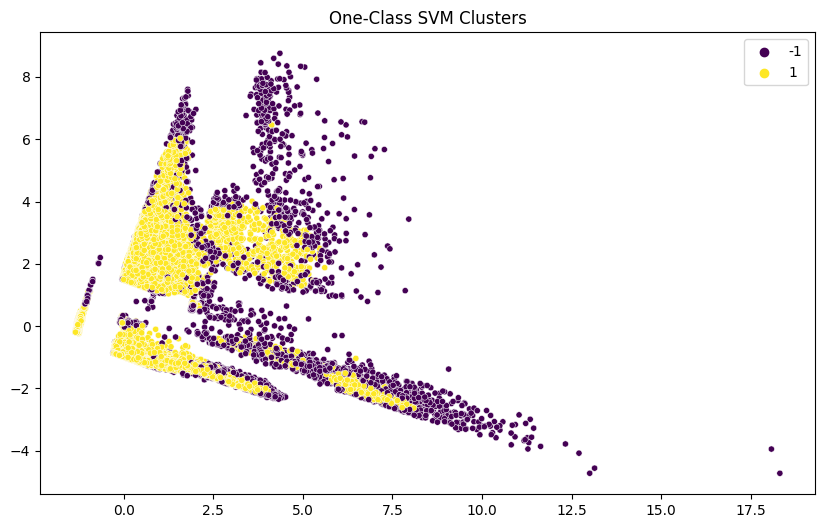

In [ ]:
outliers_ocsvm = ocsvm.fit_predict(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue= outliers_ocsvm, palette='viridis', s=20)
plt.title('One-Class SVM Clusters')
plt.show()


In [ ]:
silhouette_ocsvm = silhouette_score(features_scaled, outliers_ocsvm)
db_index_ocsvm = davies_bouldin_score(features_scaled, outliers_ocsvm)
ch_index_ocsvm = calinski_harabasz_score(features_scaled, outliers_ocsvm)

print('Silhouette score for One class SVM:', silhouette_ocsvm)
print('Davies-Bouldin Index for One class SVM:', db_index_ocsvm)
print('Calinski-Harabasz Index for One class SVM:', ch_index_ocsvm)


Silhouette score for One class SVM: 0.46613959895782275
Davies-Bouldin Index for One class SVM: 2.5906004613708546
Calinski-Harabasz Index for One class SVM: 1425.9308565122778


##DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
outliers_dbscan = dbscan.fit_predict(features_scaled)

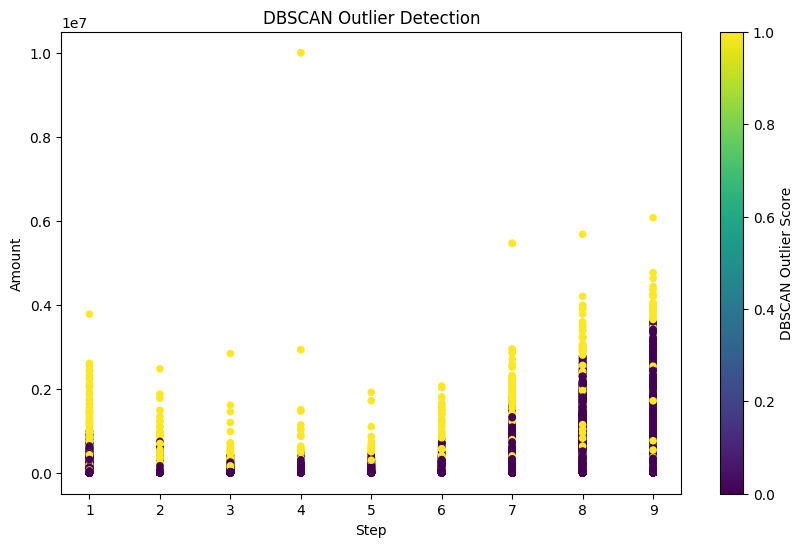

In [ ]:
dbscan_outlier_scores = (dbscan.labels_ == -1).astype(int)
plt.figure(figsize=(10, 6))
plt.scatter(features_one_hot.iloc[:, 0], features_one_hot.iloc[:, 1], c = dbscan_outlier_scores, cmap='viridis', s=20)
plt.colorbar(label='DBSCAN Outlier Score')
plt.title('DBSCAN clusters')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.show()


### Hyper Parameters


In [ ]:
# Define the parameter grid for DBSCAN
param_grid_dbscan = {
    'eps': [0.1, 0.5, 1.0],
    'min_samples': [5, 10, 15],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Create a silhouette scorer
silhouette_scorer = make_scorer(silhouette_score, greater_is_better=True)

# Perform grid search using cross-validation
grid_search_dbscan = GridSearchCV(dbscan, param_grid=param_grid_dbscan, scoring=silhouette_scorer, cv=5)
grid_search_dbscan.fit(features_scaled)

# Print the best parameters for DBSCAN
print("Best Parameters for DBSCAN:", grid_search_dbscan.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

Best Parameters for DBSCAN: {'eps': 0.1, 'metric': 'euclidean', 'min_samples': 5}


###Fine Tuning

In [ ]:
best_params_dbscan = {'eps': 0.1, 'metric': 'euclidean', 'min_samples': 5}

dbscan_tuned = DBSCAN(**best_params_dbscan)
dbscan_tuned.fit(features_scaled)

predictions_dbscan_tuned = dbscan_tuned.fit_predict(features_scaled)
silhouette_dbscan = silhouette_score(features_scaled, predictions_dbscan_tuned)
silhouette_dbscan

###Evaluation

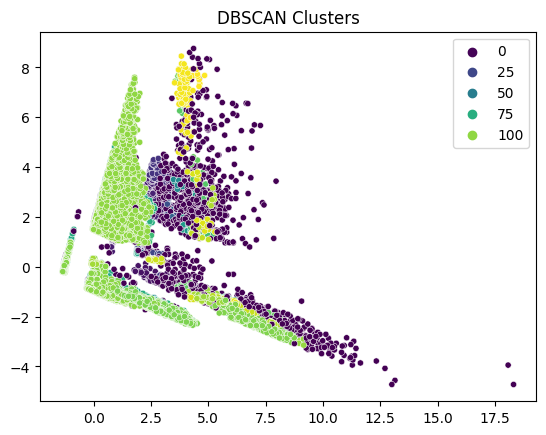

In [ ]:
outliers_dbscan = dbscan.fit_predict(features_scaled)

sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=outliers_dbscan, palette='viridis', s=20)
plt.title('DBSCAN Clusters')
plt.show()

In [ ]:
silhouette_dbscan = silhouette_score(features_scaled, predictions_dbscan_tuned)
db_index_dbscan = davies_bouldin_score(features_scaled, predictions_dbscan_tuned)
ch_index_dbscan = calinski_harabasz_score(features_scaled, predictions_dbscan_tuned)

print('Silhouette score for DBSCAN:', silhouette_dbscan)
print('Davies-Bouldin Index for DBSCAN:', db_index_dbscan)
print('Calinski-Harabasz Index for DBSCAN:', ch_index_dbscan)


Silhouette score for DBSCAN: 0.23308582205794112
Davies-Bouldin Index for DBSCAN: 1.1767692148561433
Calinski-Harabasz Index for DBSCAN: 317.3413134531669


The scatter plots above show the outlier score for each model.
* Most of the data points in these plots have low outlier scores (blue colour), indicating that they are close to their clusters and are most likely routine transactions.
* Some data points in these plots have high outlier scores (yellow colour), indicating that they are far from their clusters and are probable outliers. These data points could be fraudulent transactions with out-of-the-ordinary step or amount values.

